# Feature Comparison
### The following notebook calculates and presents the inter-group differences for every extracted feature. Those values are presented in _Tables 1-3_

In [1]:
from notebooks_constants import SRC_PATH
import sys
sys.path.insert(0, SRC_PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from vis_figures import calc_aw

from paths import SAVE_PATH
from constants import PYR_COLOR, PV_COLOR

In [2]:
drop_columns = ['region', 'num_spikes', 'max_abs', 'name']  # removing irrelevant metadata information

In [3]:
df = None
files = os.listdir(SAVE_PATH + '0/')
for file in sorted(files):
    if df is None:
        df = pd.read_csv(SAVE_PATH + '0/' + file)
    else:
        temp = pd.read_csv(SAVE_PATH + '0/' + file)
        df = df.append(temp)

df = df.drop(columns=drop_columns)

df.label = df.label.map({1: 'PYR', 0: 'PV'})

In [4]:
def change_col(df, feature):
    #  converting features from their initial values to physical values
    #  1.6 is the duration in ms of each waveform
    #  256 is the number of samples in the upsampled waveform
    conversion = 1.6 / 256 
    if feature in ['NEG_Time-lag_SD', 'FMC_Time-lag_SD', 'SMC_Time-lag_SD']: # 
        df[feature] = df[feature] * conversion * 1000 # micro seconds
    elif feature in ['FWHM', 'Max_speed', 'TTP_duration', 'Rise_coefficient']:
        df[feature] = df[feature] * conversion # ms
    elif feature in ['NEG_Time-lag_SS', 'FMC_Time-lag_SS', 'SMC_Time-lag_SS']:
        df[feature] = df[feature] * (conversion ** 2) * 1000 # 10^3 (micro s)^2
    elif feature in ["NEG_Graph_Average_weight", "NEG_Graph_Shortest_path", 'NEG_Graph_Longest_path',
                     "FMC_Graph_Average_weight", "FMC_Graph_Shortest_path", 'FMC_Graph_Longest_path',
                     "SMC_Graph_Average_weight", "SMC_Graph_Shortest_path", 'SMC_Graph_Longest_path']:
        df[feature] = (df[feature] * (1 / conversion)) # mm/s
    elif feature == 'Rise_time':
        #  16 = 2 (bins in ms) * 8 (upsampling factor)
        df[feature] = df[feature] / 16 # ms
    elif feature == 'Firing_rate':
        df[feature] = df[feature] * 1000 # ms -> s 

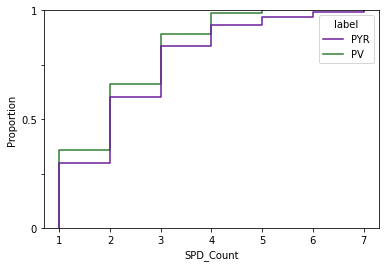

Median of pyramidal SPD_Count column is  2 [ 1,  3]
Median of pv SPD_Count column is  2 [ 1,  3]
Mann-Whitney statistical test results for feature SPD_Count are p-value= 0.0595
Effect size is  0.548
Number of unique values is: 7


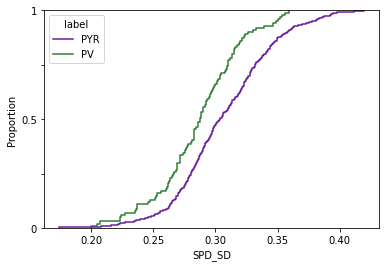

Median of pyramidal SPD_SD column is  0.304 [ 0.28,  0.332]
Median of pv SPD_SD column is  0.288 [ 0.267,  0.31]
Mann-Whitney statistical test results for feature SPD_SD are p-value= 3.02e-06
Effect size is  0.645
Number of unique values is: 512


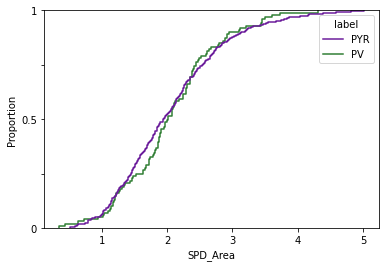

Median of pyramidal SPD_Area column is  1.95 [ 1.45,  2.54]
Median of pv SPD_Area column is  2.02 [ 1.64,  2.44]
Mann-Whitney statistical test results for feature SPD_Area are p-value= 0.289
Effect size is  0.518
Number of unique values is: 512


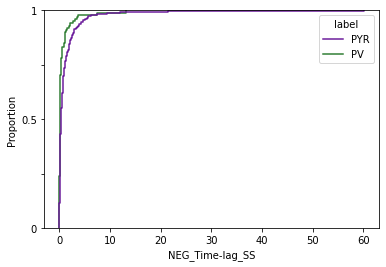

Median of pyramidal NEG_Time-lag_SS column is  0.34 [ 0.103,  1.07]
Median of pv NEG_Time-lag_SS column is  0.156 [ 0.0488,  0.352]
Mann-Whitney statistical test results for feature NEG_Time-lag_SS are p-value= 7.04e-06
Effect size is  0.639
Number of unique values is: 296


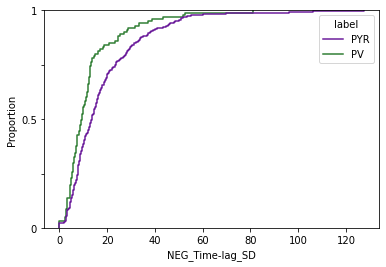

Median of pyramidal NEG_Time-lag_SD column is  13.5 [ 7.72,  23.5]
Median of pv NEG_Time-lag_SD column is  9.38 [ 5.41,  13.3]
Mann-Whitney statistical test results for feature NEG_Time-lag_SD are p-value= 3.44e-05
Effect size is  0.628
Number of unique values is: 301


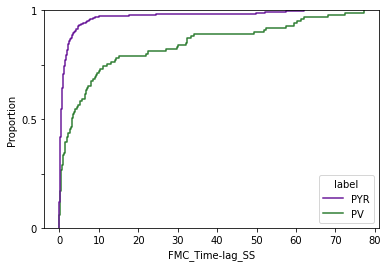

Median of pyramidal FMC_Time-lag_SS column is  0.443 [ 0.132,  1.39]
Median of pv FMC_Time-lag_SS column is  3.33 [ 0.491,  12]
Mann-Whitney statistical test results for feature FMC_Time-lag_SS are p-value= 6.47e-14
Effect size is  0.738
Number of unique values is: 342


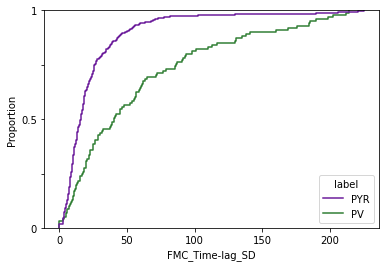

Median of pyramidal FMC_Time-lag_SD column is  15.9 [ 8.84,  26.3]
Median of pv FMC_Time-lag_SD column is  40.6 [ 17.4,  86.3]
Mann-Whitney statistical test results for feature FMC_Time-lag_SD are p-value= 2.3e-12
Effect size is  0.722
Number of unique values is: 340


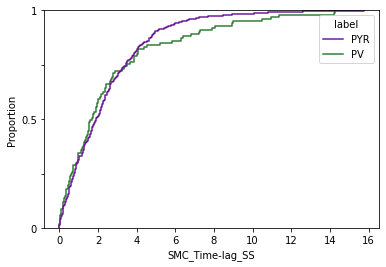

Median of pyramidal SMC_Time-lag_SS column is  1.9 [ 0.773,  3.45]
Median of pv SMC_Time-lag_SS column is  1.69 [ 0.681,  3.48]
Mann-Whitney statistical test results for feature SMC_Time-lag_SS are p-value= 0.34
Effect size is  0.513
Number of unique values is: 398


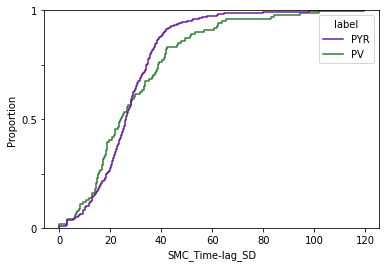

Median of pyramidal SMC_Time-lag_SD column is  26 [ 18.8,  34.3]
Median of pv SMC_Time-lag_SD column is  24.1 [ 15.6,  38.9]
Mann-Whitney statistical test results for feature SMC_Time-lag_SD are p-value= 0.475
Effect size is  0.502
Number of unique values is: 378


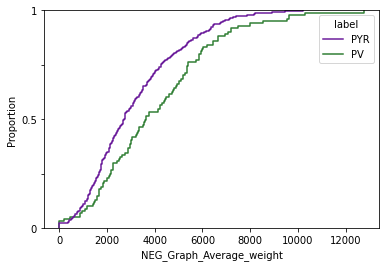

Median of pyramidal NEG_Graph_Average_weight column is  2.72e+03 [ 1.68e+03,  4.27e+03]
Median of pv NEG_Graph_Average_weight column is  3.63e+03 [ 2.17e+03,  5.39e+03]
Mann-Whitney statistical test results for feature NEG_Graph_Average_weight are p-value= 0.000313
Effect size is  0.61
Number of unique values is: 469


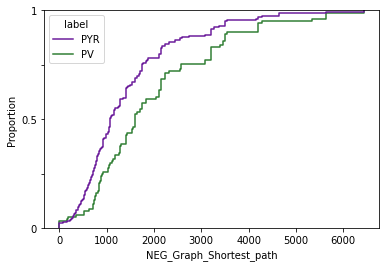

Median of pyramidal NEG_Graph_Shortest_path column is  1.07e+03 [ 715,  1.75e+03]
Median of pv NEG_Graph_Shortest_path column is  1.61e+03 [ 916,  2.57e+03]
Mann-Whitney statistical test results for feature NEG_Graph_Shortest_path are p-value= 1.4e-05
Effect size is  0.634
Number of unique values is: 194


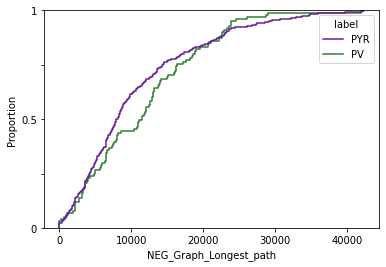

Median of pyramidal NEG_Graph_Longest_path column is  8.1e+03 [ 4.2e+03,  1.44e+04]
Median of pv NEG_Graph_Longest_path column is  1.15e+04 [ 4.92e+03,  1.63e+04]
Mann-Whitney statistical test results for feature NEG_Graph_Longest_path are p-value= 0.0597
Effect size is  0.55
Number of unique values is: 429


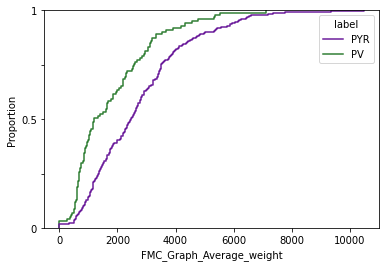

Median of pyramidal FMC_Graph_Average_weight column is  2.46e+03 [ 1.37e+03,  3.51e+03]
Median of pv FMC_Graph_Average_weight column is  1.21e+03 [ 685,  2.58e+03]
Mann-Whitney statistical test results for feature FMC_Graph_Average_weight are p-value= 1.65e-08
Effect size is  0.677
Number of unique values is: 472


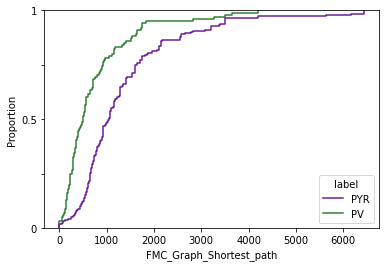

Median of pyramidal FMC_Graph_Shortest_path column is  1.05e+03 [ 657,  1.62e+03]
Median of pv FMC_Graph_Shortest_path column is  495 [ 268,  928]
Mann-Whitney statistical test results for feature FMC_Graph_Shortest_path are p-value= 1.04e-13
Effect size is  0.736
Number of unique values is: 239


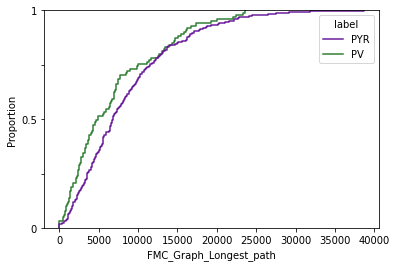

Median of pyramidal FMC_Graph_Longest_path column is  6.77e+03 [ 3.58e+03,  1.15e+04]
Median of pv FMC_Graph_Longest_path column is  4.91e+03 [ 2.42e+03,  9.95e+03]
Mann-Whitney statistical test results for feature FMC_Graph_Longest_path are p-value= 0.00525
Effect size is  0.582
Number of unique values is: 451


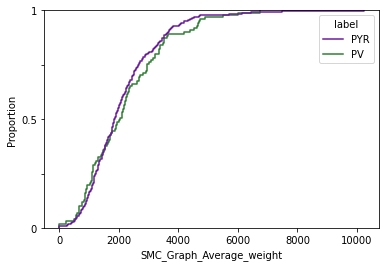

Median of pyramidal SMC_Graph_Average_weight column is  1.84e+03 [ 1.23e+03,  2.67e+03]
Median of pv SMC_Graph_Average_weight column is  2.03e+03 [ 1.1e+03,  2.95e+03]
Mann-Whitney statistical test results for feature SMC_Graph_Average_weight are p-value= 0.343
Effect size is  0.513
Number of unique values is: 484


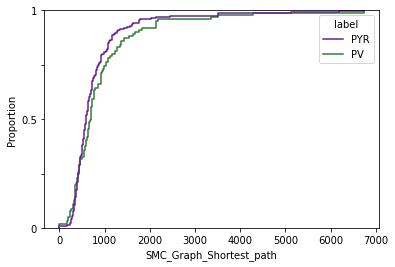

Median of pyramidal SMC_Graph_Shortest_path column is  585 [ 427,  873]
Median of pv SMC_Graph_Shortest_path column is  702 [ 409,  1.02e+03]
Mann-Whitney statistical test results for feature SMC_Graph_Shortest_path are p-value= 0.0802
Effect size is  0.545
Number of unique values is: 215


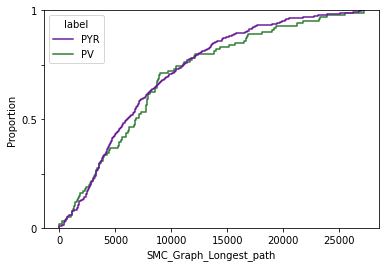

Median of pyramidal SMC_Graph_Longest_path column is  6.05e+03 [ 3.27e+03,  1.11e+04]
Median of pv SMC_Graph_Longest_path column is  6.89e+03 [ 3.24e+03,  1.11e+04]
Mann-Whitney statistical test results for feature SMC_Graph_Longest_path are p-value= 0.327
Effect size is  0.514
Number of unique values is: 473


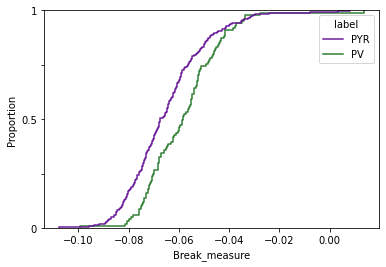

Median of pyramidal Break_measure column is -0.0674 [-0.0759, -0.0564]
Median of pv Break_measure column is -0.0585 [-0.0701, -0.0493]
Mann-Whitney statistical test results for feature Break_measure are p-value= 7.85e-06
Effect size is  0.639
Number of unique values is: 512


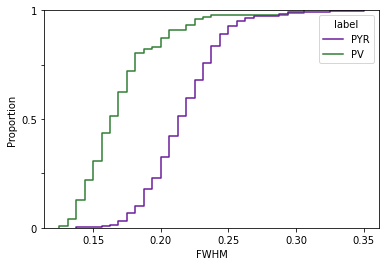

Median of pyramidal FWHM column is  0.213 [ 0.2,  0.231]
Median of pv FWHM column is  0.163 [ 0.15,  0.181]
Mann-Whitney statistical test results for feature FWHM are p-value= 3.65e-34
Effect size is  0.889
Number of unique values is: 31


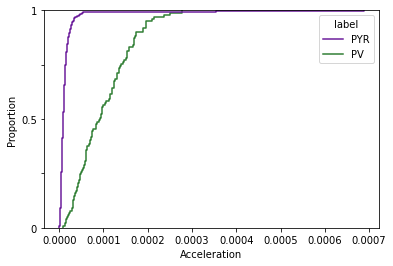

Median of pyramidal Acceleration column is  8.97e-06 [ 5.12e-06,  1.43e-05]
Median of pv Acceleration column is  9.14e-05 [ 4.86e-05,  0.000139]
Mann-Whitney statistical test results for feature Acceleration are p-value= 6.8e-49
Effect size is  0.97
Number of unique values is: 512


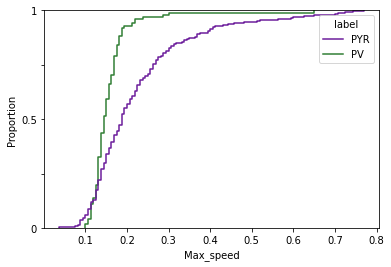

Median of pyramidal Max_speed column is  0.188 [ 0.138,  0.263]
Median of pv Max_speed column is  0.144 [ 0.131,  0.169]
Mann-Whitney statistical test results for feature Max_speed are p-value= 3.4e-09
Effect size is  0.686
Number of unique values is: 79


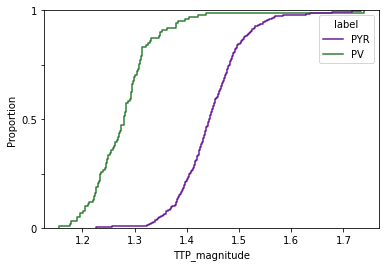

Median of pyramidal TTP_magnitude column is  1.44 [ 1.41,  1.48]
Median of pv TTP_magnitude column is  1.28 [ 1.23,  1.31]
Mann-Whitney statistical test results for feature TTP_magnitude are p-value= 3.66e-48
Effect size is  0.966
Number of unique values is: 512


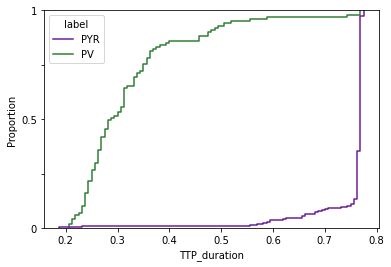

Median of pyramidal TTP_duration column is  0.769 [ 0.763,  0.769]
Median of pv TTP_duration column is  0.288 [ 0.25,  0.35]
Mann-Whitney statistical test results for feature TTP_duration are p-value= 5.89e-58
Effect size is  0.979
Number of unique values is: 65


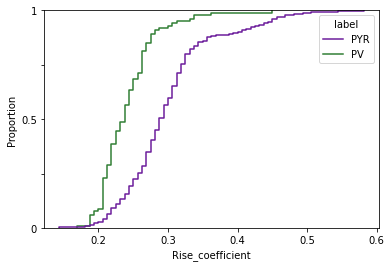

Median of pyramidal Rise_coefficient column is  0.288 [ 0.256,  0.319]
Median of pv Rise_coefficient column is  0.238 [ 0.213,  0.263]
Mann-Whitney statistical test results for feature Rise_coefficient are p-value= 2.15e-21
Effect size is  0.802
Number of unique values is: 54


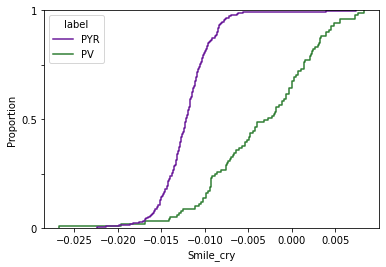

Median of pyramidal Smile_cry column is -0.0121 [-0.0137, -0.0106]
Median of pv Smile_cry column is -0.00272 [-0.00863,  0.0014]
Mann-Whitney statistical test results for feature Smile_cry are p-value= 5.73e-35
Effect size is  0.894
Number of unique values is: 512


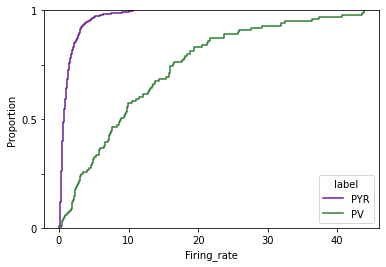

Median of pyramidal Firing_rate column is  0.669 [ 0.352,  1.47]
Median of pv Firing_rate column is  8.95 [ 3.39,  16.3]
Mann-Whitney statistical test results for feature Firing_rate are p-value= 1.02e-40
Effect size is  0.927
Number of unique values is: 512


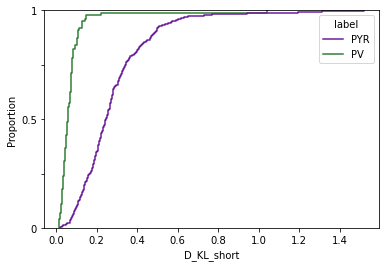

Median of pyramidal D_KL_short column is  0.246 [ 0.165,  0.343]
Median of pv D_KL_short column is  0.0585 [ 0.0369,  0.0786]
Mann-Whitney statistical test results for feature D_KL_short are p-value= 2.19e-44
Effect size is  0.947
Number of unique values is: 512


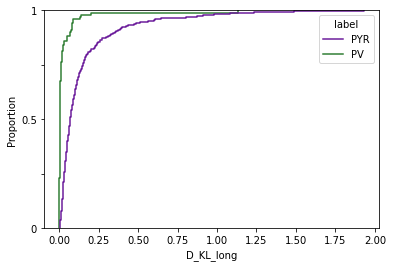

Median of pyramidal D_KL_long column is  0.0692 [ 0.0321,  0.15]
Median of pv D_KL_long column is  0.00395 [ 0.00171,  0.0123]
Mann-Whitney statistical test results for feature D_KL_long are p-value= 6.06e-35
Effect size is  0.894
Number of unique values is: 512


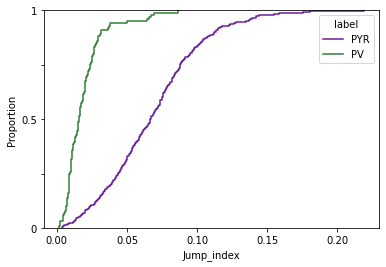

Median of pyramidal Jump_index column is  0.0666 [ 0.0441,  0.0879]
Median of pv Jump_index column is  0.0156 [ 0.00946,  0.0236]
Mann-Whitney statistical test results for feature Jump_index are p-value= 9.31e-39
Effect size is  0.916
Number of unique values is: 512


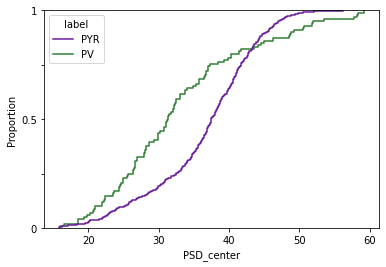

Median of pyramidal PSD_center column is  37.5 [ 32.6,  41.7]
Median of pv PSD_center column is  31.3 [ 26.3,  37.3]
Mann-Whitney statistical test results for feature PSD_center are p-value= 2.8e-06
Effect size is  0.646
Number of unique values is: 512


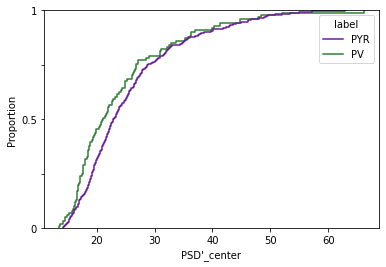

Median of pyramidal PSD'_center column is  22.9 [ 19.2,  28.8]
Median of pv PSD'_center column is  21.1 [ 17.6,  26.8]
Mann-Whitney statistical test results for feature PSD'_center are p-value= 0.0119
Effect size is  0.573
Number of unique values is: 512


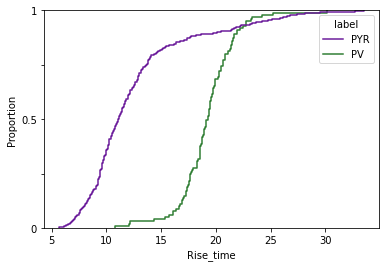

Median of pyramidal Rise_time column is  11.1 [ 9.41,  13.7]
Median of pv Rise_time column is  19.3 [ 17.8,  20.6]
Mann-Whitney statistical test results for feature Rise_time are p-value= 4.34e-33
Effect size is  0.883
Number of unique values is: 236


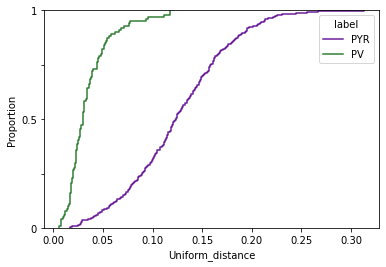

Median of pyramidal Uniform_distance column is  0.123 [ 0.0897,  0.159]
Median of pv Uniform_distance column is  0.0302 [ 0.0202,  0.0441]
Mann-Whitney statistical test results for feature Uniform_distance are p-value= 1.6e-44
Effect size is  0.948
Number of unique values is: 512


In [5]:
palette = {"PYR": PYR_COLOR, "PV": PV_COLOR}

for feature in df.columns:
    if feature in ['label']:
        continue
    change_col(df, feature)
    fig, ax = plt.subplots()
    _ = sns.ecdfplot(data=df, x=feature, hue="label", ax=ax, palette=palette)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0', '', '0.5', '', '1'])
    
    plt.show()
    
    col_pyr = df[feature][df.label == 'PYR'].to_numpy()
    col_pv = df[feature][df.label == 'PV'].to_numpy()
    
    es = calc_aw(col_pyr, col_pv)
    
    pyr_median, pyr_prec25, pyr_prec75 = np.percentile(col_pyr, [50, 25, 75])
    pv_median, pv_prec25, pv_prec75 = np.percentile(col_pv, [50, 25, 75])
    
    print(f"Median of pyramidal {feature} column is {pyr_median: .3g} [{pyr_prec25: .3g}, {pyr_prec75: .3g}]")
    print(f"Median of pv {feature} column is {pv_median: .3g} [{pv_prec25: .3g}, {pv_prec75: .3g}]")
    
    statistic, p_val = stats.mannwhitneyu(col_pyr, col_pv)
    print(f"Mann-Whitney statistical test results for feature {feature} are p-value={p_val: .3g}")
    print(f"Effect size is {es: .3g}")
    print(f"Number of unique values is: {len(np.unique(df[feature].to_numpy()))}")